In this work, you are required to train a model for dataset MNIST with PyTorch.

Load dataset:

In [2]:
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F

train_data = MNIST(
    root = "data",
    download = True,
    train = True,
    transform = torchvision.transforms.ToTensor()
    )
test_data = MNIST(
    root = "data",
    download = True,
    train = False,
    transform = torchvision.transforms.ToTensor()
    )

train_dataloader = DataLoader(train_data, batch_size = 64)
test_dataloader = DataLoader(test_data, batch_size = 64)

E:\conda\miniconda\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] 找不到指定的模块。
  warn(f"Failed to load image Python extension: {e}")


In [5]:
print(train_dataloader )

Model: you may select your favorite model and implement it in the following class.

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Evaluation: you need to implement a pipeline to train your neural network.

In [8]:
model = Model()
optimizer = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()
epochs = 5
for epoch in range(epochs):
    model.train()  # 设置模型为训练模式
    total_loss = 0.0
    for images, labels in train_dataloader:
        optimizer.zero_grad()  # 初始化梯度为0
        outputs = model(images)  # 前向传播
        loss = loss_func(outputs, labels)  #计算损失
        loss.backward()  # 后向传播
        optimizer.step()  # 更新权重
        total_loss += loss.item() * images.size(0)

    # Print average loss for the epoch
    avg_loss = total_loss / len(train_data)
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss}")

print("Training finished.")

Epoch [1/5], Loss: 0.18148444901295005
Epoch [2/5], Loss: 0.053020092475228014
Epoch [3/5], Loss: 0.036090777116517224
Epoch [4/5], Loss: 0.024892586516751906
Epoch [5/5], Loss: 0.01843236656843995
Training finished.


Epoch [1/5], Train Loss: 0.18475641774454465, Test Accuracy: 0.9708
Epoch [2/5], Train Loss: 0.053794971621828155, Test Accuracy: 0.9845
Epoch [3/5], Train Loss: 0.035024223465441415, Test Accuracy: 0.988
Epoch [4/5], Train Loss: 0.024295182460037177, Test Accuracy: 0.9769
Epoch [5/5], Train Loss: 0.019241512323662755, Test Accuracy: 0.9885


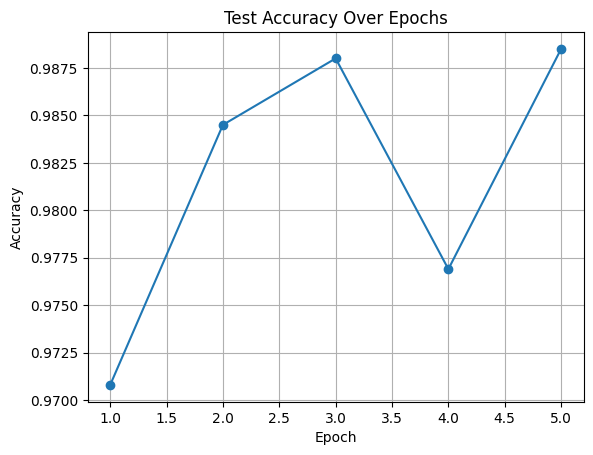

In [5]:
import matplotlib.pyplot as plt

# Function to calculate accuracy
def calculate_accuracy(model, dataloader):
    model.eval()  # 设置模型为测试模式
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

#训练过程，跟上面一样，只不过加入了可视化部分，将准确率绘制出来
model = Model()
optimizer = torch.optim.Adam(model.parameters())
loss_func = nn.CrossEntropyLoss()
epochs = 5
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    model.train() 
    total_loss = 0.0
    for images, labels in train_dataloader:
        optimizer.zero_grad()  
        outputs = model(images)  
        loss = loss_func(outputs, labels)  
        loss.backward() 
        optimizer.step() 
        total_loss += loss.item() * images.size(0)

  
    train_loss = total_loss / len(train_data)
    train_losses.append(train_loss)

    # 计算在测试集上的准确率
    test_accuracy = calculate_accuracy(model, test_dataloader)
    test_accuracies.append(test_accuracy)

    # 打印每一批次的结果
    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss}, Test Accuracy: {test_accuracy}")

# 绘制
plt.plot(range(1, epochs + 1), test_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.grid(True)
plt.show()
